## Stratégie d'investissement simple 

#### Principe :

Si la moyenne mobile 10 jours du cours de l'actif est supérieure à la moyenne mobile 20 jours, on achète, sinon on vend

### Implémentation sur la période Janvier 2010 - Juin 2018

- On part avec un capital K = 5000 USD, et un portefeuille V vide

On constate les moyennes mobiles initiales : 

#### si la 10j > 20j :
- on achète $ X_0 = \lfloor \frac{5000}{S_0 } \rfloor $
- le capital est diminué de $X_0*S_0$
- le portefeuille vaut $X_0*S_0$

###### Puis, au prochain croisement des moyennes mobiles  (date $t_1$):

- on vend nos X unités pour un prix de $X_0*S_1$
- le capital est augmenté de $X_0*S_1$
- le portefeuille est vide 
- profit de l'opération : $X_0*(S_1 - S_0)$

Et on vend à découvert $X_1$ unité d'actif, avec $ X_1 = \lfloor \frac{5000}{S_1 } \rfloor $ :

- le capital est augmenté de $X_1*S_1$
- le portefeuille vaut $-X_1*S_1$

##### À $t_2$, recroisement des moyennes mobiles (10j > 20j):

- on rachète les $X_1$ unités pour un coût de $X_1*S_2$
- le capital est diminué de $X_1*S_2$
- portefeuille vide, profit $X_1*(S_1 - S_2)$

Puis on reprend une position longue...



In [1]:
from math import*
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

 
def test_strat(ticker,start,K,end):
    
    if end < start :
        return ('Date de départ ultérieure à date de fin' )
    
    else : 
        
        dataf = pd.read_csv(r'http://hilpisch.com/tr_eikon_eod_data.csv')[ticker]
        df = dataf.dropna()
        delta_ma = df.rolling(10).mean()-df.rolling(20).mean()       #creating 10days minus 20days simple moving average dataframe of the asset 
        V = 0 #portfolio,  #K = capital (nominal)
        pos = ''
        pnl = 0
        ##### initialisation #####
        
        if delta_ma.iloc[start] >= 0 :      #long X units
            X = floor(K/df.iloc[start])     #number of units 
            K = K - X*df.iloc[start]        #capital 
            V = X*df.iloc[start]            #portfolio value
            pos = 'long'                    #position type
       
        elif delta_ma.iloc[start] <0 :                                              #short 
            X = floor(K/df.iloc[start])                     
            K = K + X*df.iloc[start]
            V = - X*df.iloc[start]
            pos = 'short'
           
        t = start
        d = t
    
        #dates ultérieures 
        
        while d < end :
            if pos == 'long' :
                while delta_ma.iloc[t] >= 0 and t < end:
                    t += 1
                if delta_ma.iloc[t] < 0 :
                    K = K + X*df.iloc[t]             #close long positions
                    pnl = pnl + X*df.iloc[t] - V
                    V = 0                            #portfolio has no value 
                    X = floor(K/df.iloc[t])          #new X depending on K and asset price at time t 
                    K = K + X*df.iloc[t]             #shorting X units --> cash entry added to K
                    V = -X*df.iloc[t]                #new porfolio value
                    pos = 'short'                    #we are now short X units 
        
            elif pos == 'short' :               
                while delta_ma.iloc[t] < 0 and t < end:
                    t += 1 
                if delta_ma.iloc[t] >= 0 :
                    K = K - X*df.iloc[t]            #close short position i.e. buy back X units of the asset 
                    pnl = pnl - V - X*df.iloc[t]
                    V = 0                           #portfolio has no value
                    X = floor(K/df.iloc[t])         #new X 
                    K = K - X*df.iloc[t]            #buying X units 
                    V = X*df.iloc[t]                #new portfolio 
                    pos = 'long'                    #now long X units
            d = t 
    return(K,V,X,pos,pnl)

In [4]:
test_strat('AAPL.O',21,5000,2000)

(19069.756947567999, -9518.8500000000004, 55, 'short', 4550.9069475679917)

In [8]:
test_strat('AMZN.O',21,5000,2000)

(492.18480000000091, 3948.8000000000002, 4, 'long', -559.01519999999982)

In [9]:
test_strat('EUR=',21,5000,2000)

(0.71989999999095744, 4036.2489999999998, 3370, 'long', -963.03110000000879)

#### Tracé des profits en fonction du temps :

In [10]:
def trace_result(ticker,end):
    pnl = [0]
    for i in range(22,end):
        pnl.append(test_strat(ticker,21,5000,i)[4])
    dates = [j for j in range(21,end)]
    plt.plot(dates,pnl,label = 'Realized P&L ')
    plt.legend()
    plt.show()

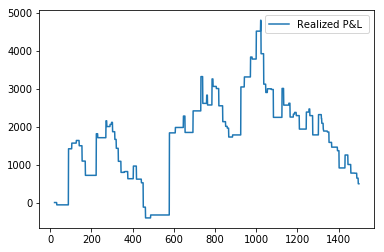

In [16]:
trace_result('AAPL.O',1500)

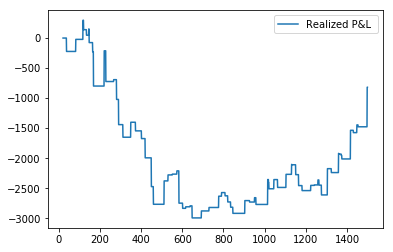

In [17]:
trace_result('AMZN.O',1500)

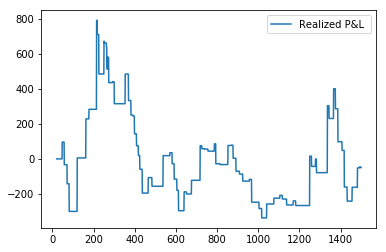

In [18]:
trace_result('EUR=',1500)